# Comentarile mele

Dragă Mihai-Drețcanu, mulțumesc pentru exerciții. Sunt foarte mulțumit că ați folosit celule cu textul, și $\LaTeX$ pentru formule și expresie matemătice. Sper că nu au fost prea mult timp care ați "pierdut", dar asta este o soft-skill care îți replatește sigur.


A propos, daca doriți o linea separatoare, atunci scrieți asta așa:


-------------------------



3. Se consideră urmatoarea ecuație diferențială:

$$ \large{y'(x) + \frac{k}{x}y(x) = x^3}$$

cu $k$ ∈ $\mathbb{R}$ .

-------

(a) Determinați soluția generală.

$$---------------------------------------------------------------$$

Vom declara mai întai $k$ si $x$ ca variabile si $y$ ca o funcție de $x$.

In [1]:
var("x,k")
y(x)=function("y")(x)

Acum vom defini ecuația diferențială din enunț.

In [2]:
general_equation=diff(y,x,1)+(k/x)*y(x)==x^3
show(general_equation)

x |--> k*y(x)/x + diff(y(x), x) == x^3

Arată puțin diferit de forma din enunț, dar dacă ne uităm cu atenție este de fapt aceiași ecuație. (în loc de forma $y'(x)$ avem notația cu deront pentru a se știi în mod clar că ne referim la derivata în funcție de $x$)

-------------------------------

$\color{red}{\text{Tip}}$ hasta este pentru că objectul in `general equation` este interpretat că ceva care primește input $x$ (variabila simbolica) și ne dau un object de tip ecuație. Sage foloșeste cazul generic cu derivata parțiala $\partial/\partial x$ care in cazul cu singura variabila este echivalent cu $\mathrm d/ \mathrm dx$.

-------------------------------

(Am încercat să-i dau expand() in speranța că poate  voi avea k/x ca termen separat, dar rezultatul este același, așa că am lasat fără general_equation.expand())

Acum vom rezolva ecuația folosindu-ne de un desolve aplicat chiar pe variabila ce reține ecuația, urmând să afișăm soluția utilizând forma expanded. (voi numerota relațiile pentru a putea face referințe ușor ulterior)

In [3]:
general_solution=desolve(general_equation,[y,x])
print("(1)")
show(general_solution.expand())

(1)


x^4/(k + 4) + _C/x^k

Totuși, observăm că pentru $k= -4$ obținem o situație de nedeterminare - vom face un desolve separat în care $k$ este substituit cu $-4$ pentru a obține soluția pentru acest caz particular.

In [4]:
general_solution_particular=desolve(general_equation.subs(k==-4),[y,x])
print("(2)")
show(general_solution_particular)

(2)


(_C + log(x))*x^4

Acum că avem formele soluțiilor pentru toți $k$, ar trebui să ne întrebăm pe ce intervale nedegenerate pot fi definite aceste funcții.(Deoarece noi lucrăm cu funcții continue definite pe intervale nedegenerate)

Pentru $k= -4$, funcția poate fi definită pe doar(0;+$\infty$) datorită logaritmului.

Funcția e definită pe (0;+$\infty$) pentru orice valoare a lui $k$.

Observăm că ecuația inițială nu este definită în $x=0$ decât pentru $k=0$ (din cauză că avem o împărțire la $x$ ce dispare doar pentru $k=0$), deci funcția noastră de asemeni nu va fi definită în $x=0$ decât pentru $k=0$.

Funcția e definită pe (-$\infty$;0) doar dacă $k\neq-4$ și $k=\frac{p}{q}$, unde $p$ și $q$ sunt numere întregi,$gcd(p,q)=1$, iar $q$ nu este multiplu de 2. (Altfel am avea $\sqrt(negativ)$ )

-------------------------------


$\color{red}{\text{Tip}}$ Pentru textul in formule matematice folosit fie `\mathrm{}` fie `\text{}`. De exemplu $\sqrt{\text{negativ}}$, și pentru gcd avem și $\gcd(p,q)$. 

$\color{red}{\text{Intrebare}}$ Acolo nu am înteles ce ăti scris: De ce trebue să fie $k \in \mathbb Q$? Așa cum eu văd ecuație, nu este nici o restricție că $k$ nu poate sa fie de $\mathbb R$.

-------------------------------



Deci, dacă $k=0$, funcția poate fi definită pe $\mathbb{R}$

Altfel, dacă $k\neq-4$ și $k=\frac{p}{q}$, unde $p$ și $q$ sunt numere întregi,$gcd(p,q)=1$, iar $q$ nu este multiplu de 2, funcția poate să fie definită fie pe intervalul (-$\infty$ ;0), fie pe (0;+$\infty$).

Altfel, funcția poate fi definită doar pe (0;+$\infty$)

$$---------------------------------------------------------------$$

(b) Pentru $k=1$ reprezentați grafic câteva soluții.

$$---------------------------------------------------------------$$

Deoarece avem deja reținută soluția generală pentru toți k, observăm că valoarea $k=1$ intră în cazul (1), așa că doar vom substitui valoarea $k$ cu $1$ in soluția respectivă.

In [5]:
solution_k1=general_solution.subs(k==1)
show(solution_k1)

1/5*(x^5 + 5*_C)/x

Ce avem noi acum este o colecție de soluții, fiecare valoare ce o ia $C$ determinând o nouă soluție. Așadar, noi dorim să substituim acest $C$ cu anumite valori particulare. Din aceasta cauza, îl vom defini ca o variabila (Toate constantele date de desolve in sagetmath sunt automat precedate de un underscore ($\_C$, spre exemplu), deci să nu uităm să luăm asta în considerare)

In [6]:
_C=var("_C")

Acum vom afișa pe rând graficile funcțiilor cu un for pentru valorile C=-3,-2...,2,3 . (și vom pune limite pentru y pentru a fi plăcut pentru ochi)

'For C=' -3 ',   y(x)=' 1/5*(x^5 - 15)/x

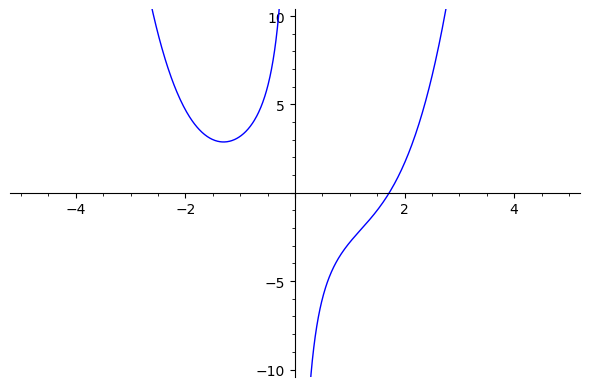

'For C=' -2 ',   y(x)=' 1/5*(x^5 - 10)/x

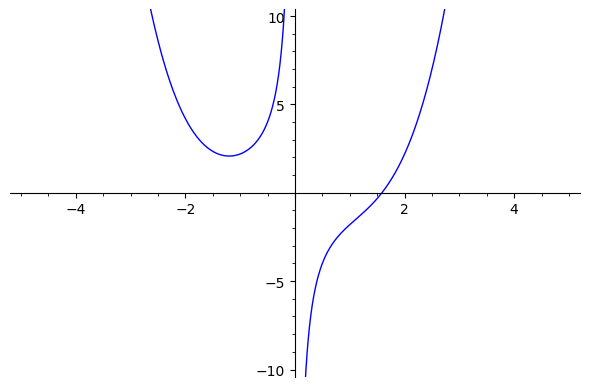

'For C=' -1 ',   y(x)=' 1/5*(x^5 - 5)/x

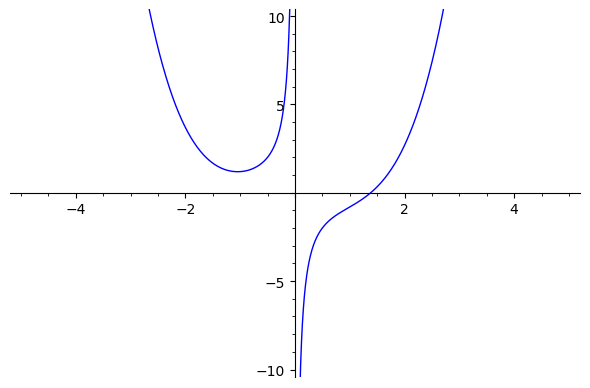

'For C=' 0 ',   y(x)=' 1/5*x^4

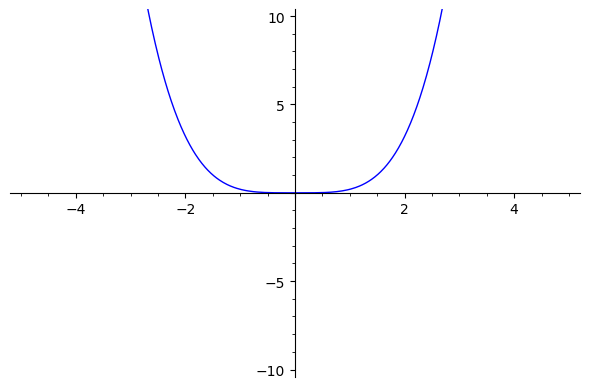

'For C=' 1 ',   y(x)=' 1/5*(x^5 + 5)/x

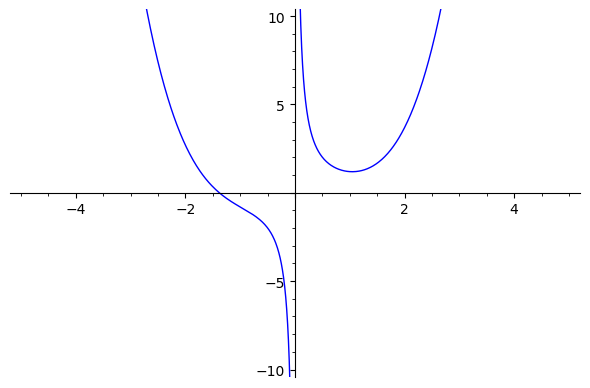

'For C=' 2 ',   y(x)=' 1/5*(x^5 + 10)/x

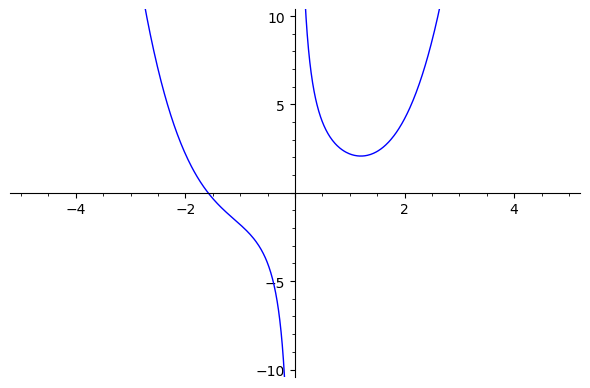

'For C=' 3 ',   y(x)=' 1/5*(x^5 + 15)/x

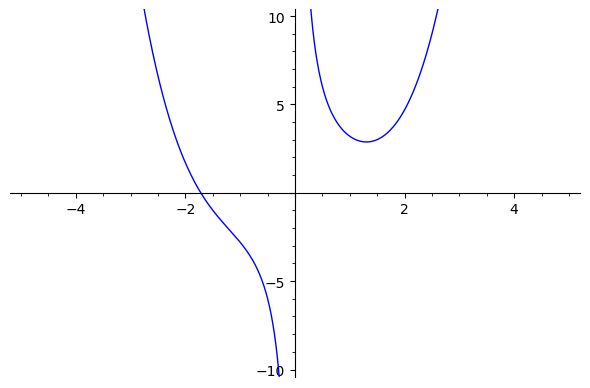

In [7]:
for i in range(-3,4):
    show("For C=",i,",   y(x)=",solution_k1.subs(_C==i))
    show(plot(solution_k1.subs(_C==i),(x,-5,5),exclude=[0]),ymin=-10,ymax=10)

Este totuși de remarcat că noi ar trebui să discutăm despre soluții doar pe intervale. Din ce am văzut la (a), pentru $k=1$ funcția poate fi definită fie pe (-$\infty$ ;0), fie pe (0;+$\infty$). Astfel, fiecare grafic conține de fapt două soluții diferite, cu aceiași formă generală, dar definite pe intervale diferite. Cum pentru $k=1$ funcția nu este definită în $x=0$, am dat exclude acestui punct în grafice.

Observăm totuși că pentru $C=0$ forma funcției ar putea fi definită chiar pe întregul $\mathbb{R}$, dar, din nou, datorită condițiilor menționate anterior, avem tot doua soluții diferite, definite pe intervale diferite, niciunul dintre acestea conținându-l pe $0$.

$$---------------------------------------------------------------$$

(c)Pentru $k=1$ determinați soluția problemei Cauchy

\begin{cases} \large y'(x)+ \frac{k}{x} * y(x)=x^3 \\ \large y(1)=0\end{cases}

și reprezentați-o grafic.

$$---------------------------------------------------------------$$

Varianta 1: Acest sistem de ecuații este de fapt o problema Cauchy pentru ecuația inițială, deci putem substitui in aceasta $k$ cu $1$ și să aplicăm în mod direct un desolve cu condiții inițiale. (voi trata ulterior o alta metodă de rezolvare)

1/5*(x^5 - 1)/x

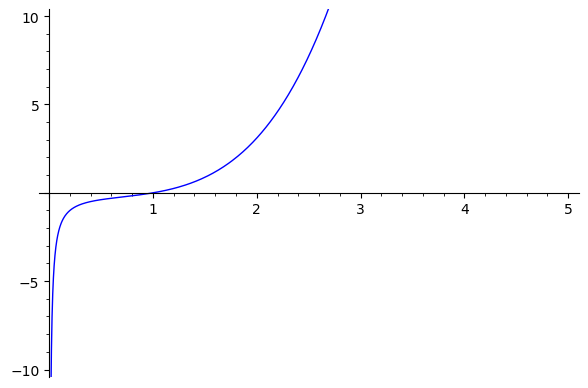

In [8]:
solution_for_c=desolve(general_equation.subs(k==1),[y,x],ics=[1,0])
show(solution_for_c)
plot(solution_for_c,(x,0,5),ymin=-10,ymax=10)

Din nou, soluțiile noastre ar trebui să fie pe intervale continue - fie (-$\infty$ ;0), fie (0;+$\infty$). Cum din problema Cauchy avem că funcție este definită în punctul $x=1$, intervalul de definire al funcției este (0;+$\infty$).

Varianta 2: Pe de altă parte, putem rezolva problema privind-o ca pe un simplu sistem de ecuații. Deja am rezolvat prima ecuație în subpunctul anterior (în (b) ) și am obținut o colecție de funcții ce diferă printr-o constantă. Tot ce mai rămâne este să verificăm cea de a doua ecuație pentru a afla acea constantă. Noi avem deja aflată forma generală a lui y din prima ecuație, deci avem tot ce este necesar pentru a rezolva cea de a doua ecuație.

Din nou, este important de notat intervalul de lucru: cum $y$ este definită în $x=1$, asumăm că $y(x)$ este definită pe (0;+$\infty$)

In [8]:
system_second_equation=solution_k1.subs(x==1)==0
show(system_second_equation)

_C + 1/5 == 0

Iar de aici putem afla cu ușurință care este constanta $C$. O vom declara ca variabilă (am declarat-o deja ca variabilă într-un subpunct anterior, dar mai bine să fim siguri), apoi, ca să fim siguri că nu facem vreo greșeală de calcul în această ecuație vom folosi funcția solve

In [9]:
var("_C")
show(solve(system_second_equation,_C))

[_C == (-1/5)]

Încântător.

Acum tot ce a mai rămas este să înlocuim această constantă în soluția generală obținută din prima ecuație și să îi desenăm graficul.

1/5*(x^5 - 1)/x

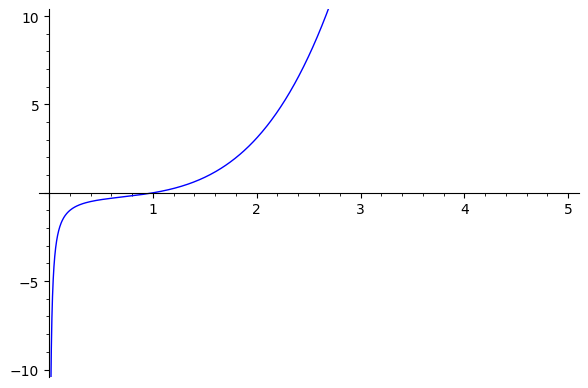

In [10]:
solution_for_c=solution_k1.subs(_C==(-1/5))
show(solution_for_c)
plot(solution_for_c,(x,0,5),ymin=-10,ymax=10)

$$---------------------------------------------------------------$$

(d) Utilizând comanda animate vizualizați dependența soluției Cauchy de la punctul (c) față de parametrul $k$.

$$---------------------------------------------------------------$$

Voi lua în particular pentru $k$ valorile întregi de la $-10$ la $10$

Pentru a rezolva cerința, voi determina functiile cautate folosind desolve, parcurgand cu $k$ de la $-10$ la $10$. O data ce rezolv o ecuatie, voi determina și graficele funcției soluție folosind plot si o voi adăuga într-o lista de ploturi.

Din nou, vom lua în considerare dependența de $k$ a intervalelor de definiție ale funcțiilor. Cum $x=1$ trebuie să aparțină intervalului de definiție, pentru toate valorile nenule ale lui $k$ soluțiile vor fi definite pe (0;+$\infty$), iar pentru $k=0$, funcția va fi definită pe $\mathbb{R}$;

In [11]:
list_of_plots_d=[]
#mai intai le punem pe cele de la -10 la -1
for i in range(-10,0):
    solution_to_plot=desolve(general_equation.subs(k==i),[y,x],[1,0])
    plot_to_add=plot(solution_to_plot,(x,0,5),ymin=-10,ymax=10)#nu stiu de ce nu merg xmin si xmax aici
    plot_to_add.set_axes_range(xmin=-5, xmax=5)#asa ca am cautat pe internet alta modalitate de a impune limite
    list_of_plots_d.append(plot_to_add)
#facem pauza de la for pentru a pune cazul special cand k==0
solution_to_plot=desolve(general_equation.subs(k==0),[y,x],[1,0])
plot_to_add=plot(solution_to_plot,(x,-5,5),ymin=-10,ymax=10)
plot_to_add.set_axes_range(xmin=-5, xmax=5)
list_of_plots_d.append(plot_to_add)
#si ne intoarcem de unde am ramas in for
for i in range(1,11):
    solution_to_plot=desolve(general_equation.subs(k==i),[y,x],[1,0])
    plot_to_add=plot(solution_to_plot,(x,0,5),ymin=-10,ymax=10)
    plot_to_add.set_axes_range(xmin=-5, xmax=5)
    list_of_plots_d.append(plot_to_add)

Acum avem o listă cu ploturile căutate. Tot ce mai rămane e să dăm listei animate. Pentru a vedea mai bine graficele, vom folosi funcția show, ce permite să modificăm durata de timp pentru care este afișat pe ecran un grafic prin intermediul parametrului delay.

Animation with 21 frames
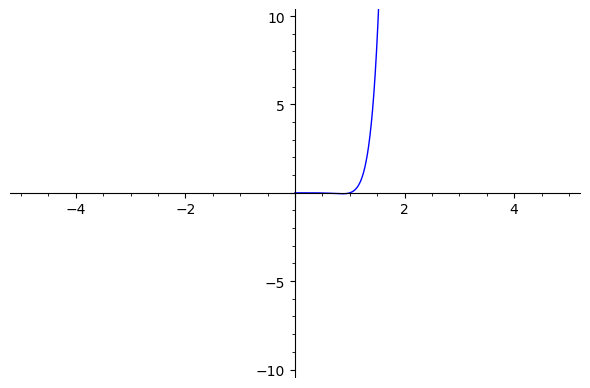

In [14]:
show(animate(list_of_plots_d),delay=100)

Acum, poate ar fi mai plăcubil să vedem graficele doar pe intervalul (0;+$\infty$), pe care toate sunt definite.

In [15]:
list_of_plots_d=[]
for i in range(-10,11):
    solution_to_plot=desolve(general_equation.subs(k==i),[y,x],[1,0])
    plot_to_add=plot(solution_to_plot,(x,0,5),ymin=-10,ymax=10)
    list_of_plots_d.append(plot_to_add)

Animation with 21 frames
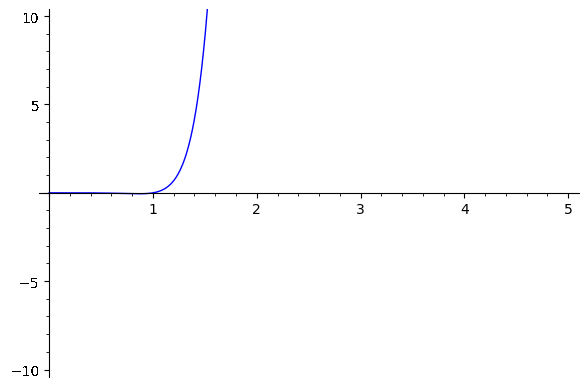

In [16]:
show(animate(list_of_plots_d),delay=100)

Totuși, nimic nu ne oprește din a vedea concomitent graficele soluțiilor dacă ar fi definite pe domeniul lor maxim de definiție. (Deoarece $k=-4$ este mai special, l-am colorat cu roșu)


In [17]:
list_of_plots_d=[]
#mai intai le punem pe cele de la -10 la -3
for i in range(-10,-4):
    solution_to_plot=desolve(general_equation.subs(k==i),[y,x],[1,0])
    plot_to_add=plot(solution_to_plot,(x,-5,5),ymin=-10,ymax=10)
    list_of_plots_d.append(plot_to_add)
#facem pauza de la for pentru a pune cazul special cand k==-4, deoarece nu este definita pentru x negativ
solution_to_plot=desolve(general_equation.subs(k==-4),[y,x],[1,0])
plot_to_add=plot(solution_to_plot,(x,0,5),ymin=-10,ymax=10,color="red")
plot_to_add.set_axes_range(xmin=-5, xmax=5)
list_of_plots_d.append(plot_to_add)
#si ne intoarcem de unde am ramas in for
for i in range(-3,11):
    solution_to_plot=desolve(general_equation.subs(k==i),[y,x],[1,0])
    plot_to_add=plot(solution_to_plot,(x,-5,5),ymin=-10,ymax=10)
    plot_to_add.set_axes_range(xmin=-5, xmax=5)
    list_of_plots_d.append(plot_to_add)

Animation with 21 frames
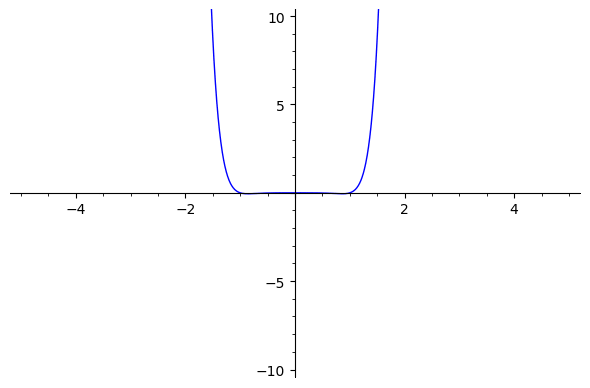

In [18]:
show(animate(list_of_plots_d),delay=100)

Observăm că graficul pentru $x$ negativ nu se mișcă uniform, probabil deoarece soluția generală $y(x)$ definită pentru $x$ negativ nu este chiar continuă față de $k$, deoarece există multe "goluri" în domeniul din care $k$ își ia valorile (domeniul lui $k$ nu este un interval nedegenerat, sau cel puțin o reuniune de intervale nedegenerate, pentru a vorbi măcar de niște mulțimi pe care graficele să determine o mișcare uniformă).

În schimb, putem observa că graficele par că se mișcă uniform atunci când privim doar funcțiile pentru care $x^k$ are aceiași paritate

În continuare, am dat diferite valori lui $k$ pentru a emula o mișcare continuă.

Aici am luat valorile pare de la $-20$ la $20$ ,mai puțin $k=-4$

In [19]:
list_of_plots_d=[]
#mai intai le punem pe cele de la -20 la -6
for i in range(-10,-2):
    solution_to_plot=desolve(general_equation.subs(k==2*i),[y,x],[1,0])
    plot_to_add=plot(solution_to_plot,(x,-5,5),ymin=-10,ymax=10)
    list_of_plots_d.append(plot_to_add)
#sarim peste -4 si continuam
for i in range(-1,11):
    solution_to_plot=desolve(general_equation.subs(k==2*i),[y,x],[1,0])
    plot_to_add=plot(solution_to_plot,(x,-5,5),ymin=-10,ymax=10)
    plot_to_add.set_axes_range(xmin=-5, xmax=5)
    list_of_plots_d.append(plot_to_add)

Animation with 20 frames
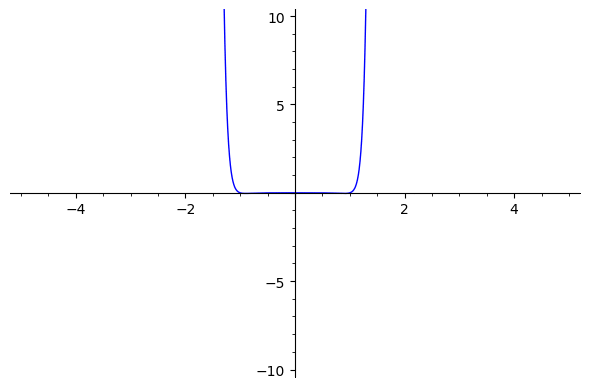

In [20]:
show(animate(list_of_plots_d),delay=100)

Acum voi pune și graficul pentru $k=-4$ (Caz pe care l-am colorat din nou cu roșu)

In [21]:
solution_to_plot=desolve(general_equation.subs(k==-4),[y,x],[1,0])
plot_to_add=plot(solution_to_plot,(x,0,5),ymin=-10,ymax=10,color="red")
plot_to_add.set_axes_range(xmin=-5, xmax=5)
list_of_plots_d.insert(8,plot_to_add)

Animation with 21 frames
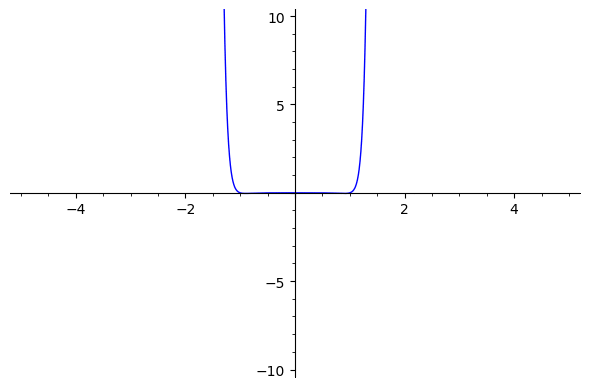

In [22]:
show(animate(list_of_plots_d),delay=100)

Aici am luat valorile impare de la $-19$ la $19$

In [23]:
list_of_plots_d=[]
for i in range(-9,11):
    solution_to_plot=desolve(general_equation.subs(k==2*i-1),[y,x],[1,0])
    plot_to_add=plot(solution_to_plot,(x,-5,5),ymin=-10,ymax=10)
    list_of_plots_d.append(plot_to_add)

Animation with 20 frames
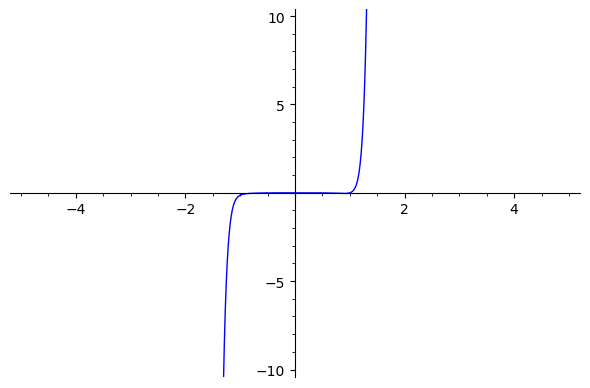

In [24]:
show(animate(list_of_plots_d),delay=100)

Hmmm... O să să pun și graficul pentru $k=-4$ în această listă, pentru a arăta mai interesant. (Îl voi colora, bineînțeles, în roșu)

In [25]:
solution_to_plot=desolve(general_equation.subs(k==-4),[y,x],[1,0])
plot_to_add=plot(solution_to_plot,(x,0,5),ymin=-10,ymax=10,color="red")
plot_to_add.set_axes_range(xmin=-5, xmax=5)
list_of_plots_d.insert(8,plot_to_add)

Animation with 21 frames
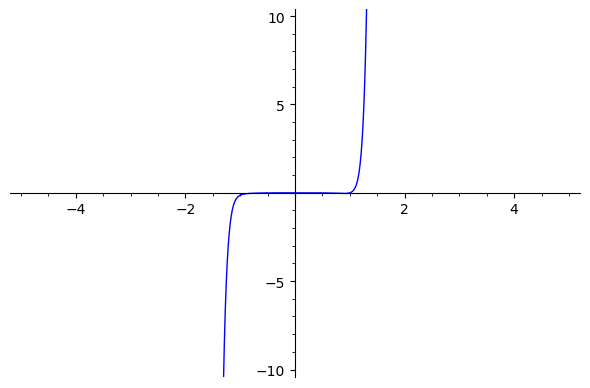

In [26]:
show(animate(list_of_plots_d),delay=100)

Aș fi dorit să fac grafice și pentru numere $k$ de forma $ k=\frac{a}{3}$, $a$ număr întreg, dar, din păcate, sagemath nu reușește să deseneze în mai multe cazuri pentru $x<0$ (deoarece încearcă să aproximeze cu o rădăcină complexă).

# Comentarile finale

Mulțumesc o data pentru efortul, a fost un exercițiul foarte complet, și sper că să ar fi de folos la familiarizareă cu Sage și cu ecuație pere care avem văzut.